In [1]:
# 스케일링을 하지 않은 경우의 예
# 오차가 너무 커지는 문제
import pandas as pd

df = pd.read_csv('c:/data/time/data2.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16840\1244603366.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


In [2]:
df['date'] = pd.to_datetime(df['date'])

# 이 날짜를 index로 설정
df = df.set_index('date')
df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


<Axes: xlabel='date'>

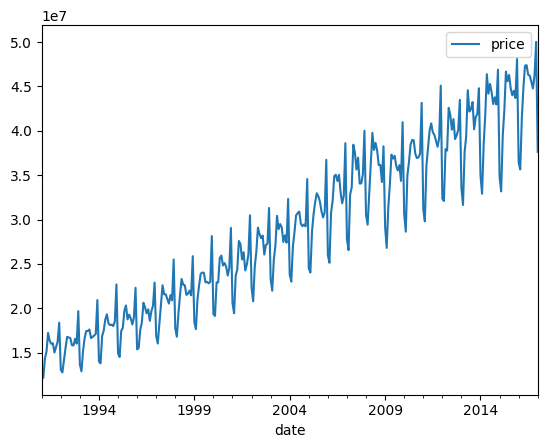

In [3]:
df.plot()

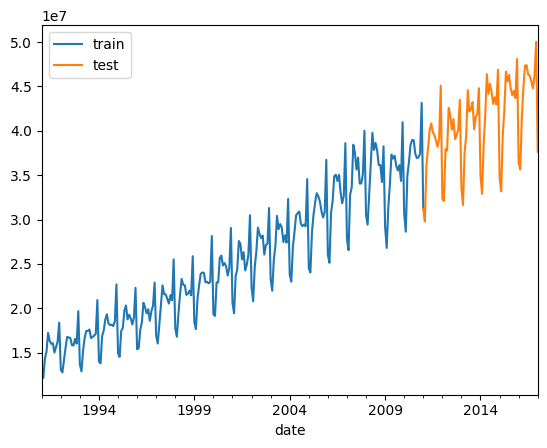

In [4]:
import matplotlib.pyplot as plt

split_date = pd.Timestamp('01-01-2011')

# 학습용: 2011/1/1까지의 자료
# 검증용: 이후 자료

train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]
ax = train.plot()
test.plot(ax=ax)

plt.legend(['train', 'test'])

In [5]:
train_sc_df = pd.DataFrame(train, columns=['price'], index=train.index)

test_sc_df = pd.DataFrame(test, columns=['price'], index=test.index)

train_sc_df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


In [6]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['price'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['price'].shift(s)
train_sc_df.head(13)

,price,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,12588862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,12154321,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,14337072,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,15108570,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,17225734,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,16342833,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,15996243,16342833.0,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,16064910,15996243.0,16342833.0,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN
1991-09-01,15015317,16064910.0,15996243.0,16342833.0,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN


In [7]:
# 독립변수 : shift_1 ~ shift_12
X_train = train_sc_df.dropna().drop('price', axis=1)

# 종속변수 : Scaled
y_train = train_sc_df.dropna()[['price']]

X_test = test_sc_df.dropna().drop('price', axis=1)
y_test = test_sc_df.dropna()[['price']]

In [8]:
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

#print(X_train.shape)
print(X_train)
#print(y_train_shape)
print(y_train)

[[18381340. 16237366. 15606864. ... 14337072. 12154321. 12588862.]
 [13084963. 18381340. 16237366. ... 15108570. 14337072. 12154321.]
 [12773972. 13084963. 18381340. ... 17225734. 15108570. 14337072.]
 ...
 [37014326. 36923390. 37395330. ... 30668321. 40969765. 34354756.]
 [37408825. 37014326. 36923390. ... 28632551. 30668321. 40969765.]
 [43147947. 37408825. 37014326. ... 34967182. 28632551. 30668321.]]
[[13084963]
 [12773972]
 [14198775]
 [15558390]
 [16776396]
 [16716231]
 [16637483]
 [15842075]
 [15812400]
 [16562268]
 [16015869]
 [19682921]
 [13672727]
 [12900733]
 [15211859]
 [16642246]
 [17442405]
 [17444074]
 [17610326]
 [16645660]
 [16790330]
 [16921755]
 [17124609]
 [20928208]
 [14005058]
 [13799079]
 [16865149]
 [17494589]
 [18739509]
 [19323481]
 [18297834]
 [18101290]
 [18161417]
 [17998875]
 [18516766]
 [22688647]
 [14927996]
 [14520623]
 [17457477]
 [17774107]
 [19740889]
 [20319460]
 [18747299]
 [19280525]
 [18860566]
 [18177152]
 [18962903]
 [22308880]
 [15379086]
 [15

In [9]:
X_train.shape

(229, 12)

In [10]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(229, 12, 1)
[[[18381340.]
  [16237366.]
  [15606864.]
  ...
  [14337072.]
  [12154321.]
  [12588862.]]

 [[13084963.]
  [18381340.]
  [16237366.]
  ...
  [15108570.]
  [14337072.]
  [12154321.]]

 [[12773972.]
  [13084963.]
  [18381340.]
  ...
  [17225734.]
  [15108570.]
  [14337072.]]

 ...

 [[37014326.]
  [36923390.]
  [37395330.]
  ...
  [30668321.]
  [40969765.]
  [34354756.]]

 [[37408825.]
  [37014326.]
  [36923390.]
  ...
  [28632551.]
  [30668321.]
  [40969765.]]

 [[43147947.]
  [37408825.]
  [37014326.]
  ...
  [34967182.]
  [28632551.]
  [30668321.]]]
[[13084963]
 [12773972]
 [14198775]
 [15558390]
 [16776396]
 [16716231]
 [16637483]
 [15842075]
 [15812400]
 [16562268]
 [16015869]
 [19682921]
 [13672727]
 [12900733]
 [15211859]
 [16642246]
 [17442405]
 [17444074]
 [17610326]
 [16645660]
 [16790330]
 [16921755]
 [17124609]
 [20928208]
 [14005058]
 [13799079]
 [16865149]
 [17494589]
 [18739509]
 [19323481]
 [18297834]
 [18101290]
 [18161417]
 [17998875]
 [18516766]
 

In [11]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, 변수개수)
model.add(Dense(1)) # 출력층의 노드 개수 1
model.compile(loss='mse', optimizer='adam')
model.summary()

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781 (6.96 KB)

 Trainable params: 1,781 (6.96 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 708965889474560.0000  
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 703262911102976.0000 
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 728464101474304.0000 
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 709009711562752.0000 
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 725533390274560.0000 
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 716698910982144.0000 
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 716449735770112.0000 
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 716893124034560.0000 
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 713852488515584.0000 
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 703577718784000.0000 
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 706389982838784.0000 
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 713847656677376.0000 
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [13]:
score=model.evaluate(X_test_t, y_test, verbose=0)
print(score) # 평균제곱오차

y_pred = model.predict(X_test_t)

print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

1760141351321600.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[2.9956489 2.9956489 2.9956489 2.9956489 2.9956489 2.9956489 2.9956489
 2.9956489 2.9956489 2.9956489]
[32361808 32087072 37933733 37775805 42584571 41789242 40130908 41321526
 39069513 39487597]


In [14]:
import numpy as np

# 실제값-예측값의 평균값
np.mean(y_test - y_pred)

41628733.82402327

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 


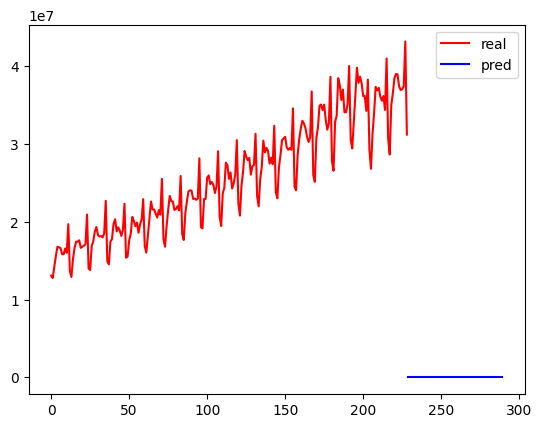

In [15]:
import matplotlib.pyplot as plt

pred=model.predict(X_test_t)

a=np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))

b=np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))

plt.plot(a, 'r-', label='real')

plt.plot(b, 'b-', label='pred')

plt.legend()

plt.show()